In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt



In [ ]:
# Parameters
vocab_size = 10000  # Only consider the top 10,000 words
maxlen = 500  # Maximum length of a review; sequences longer than this will be truncated
embedding_dim = 32



# **Pre-Processing**

In [ ]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)



Dataset splitting

In [ ]:
# Split the training data into training and validation sets
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



# Build **Model**



# Original Model

In [ ]:
# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(64),  # You can also use GRU(64) here
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Train Model






In [ ]:
# Train the model
history = model.fit(
    x_train_new, y_train_new,
    epochs=20,  # You can adjust the number of epochs
    batch_size=32,  # You can adjust the batch size
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)



Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 251ms/step - accuracy: 0.6998 - loss: 0.5472 - val_accuracy: 0.8656 - val_loss: 0.3364
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 208s 261ms/step - accuracy: 0.8958 - loss: 0.2632 - val_accuracy: 0.8768 - val_loss: 0.3000
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 251ms/step - accuracy: 0.9310 - loss: 0.1931 - val_accuracy: 0.8600 - val_loss: 0.3801
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 245ms/step - accuracy: 0.9431 - loss: 0.1559 - val_accuracy: 0.8710 - val_loss: 0.3443
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 247ms/step - accuracy: 0.9561 - loss: 0.1303 - val_accuracy: 0.8682 - val_loss: 0.3836


# Model Evaluation

782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.8705 - loss: 0.3151
Test Loss: 0.31394779682159424
Test Accuracy: 0.8694400191307068


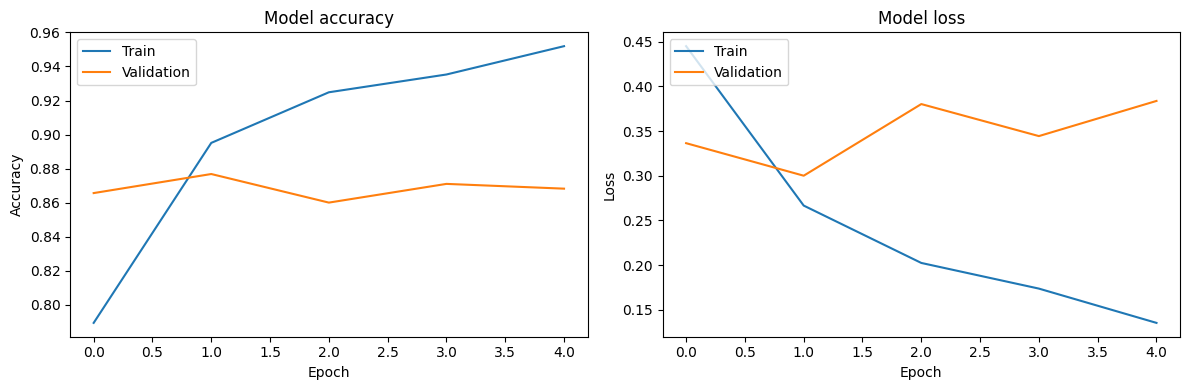

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Hyperparameter Tuning 1:Adding droupout(overcome **overfitting**)








# Model Build (Hyperparameter Tuning 1)



In [ ]:
# Define the model with dropout
model_dropout = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_dropout.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Train the model with dropout
history_dropout = model_dropout.fit(
    x_train_new, y_train_new,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)



Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 312s 491ms/step - accuracy: 0.5523 - loss: 0.6724 - val_accuracy: 0.4924 - val_loss: 0.6914
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 487ms/step - accuracy: 0.6591 - loss: 0.5969 - val_accuracy: 0.7448 - val_loss: 0.5813
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 328s 497ms/step - accuracy: 0.8415 - loss: 0.3825 - val_accuracy: 0.8272 - val_loss: 0.3934


Model Evalution (Hyperparameter Tuning 1))

782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 138ms/step - accuracy: 0.5111 - loss: 0.6896
Test Loss with Dropout: 0.6907515525817871
Test Accuracy with Dropout: 0.5029600262641907


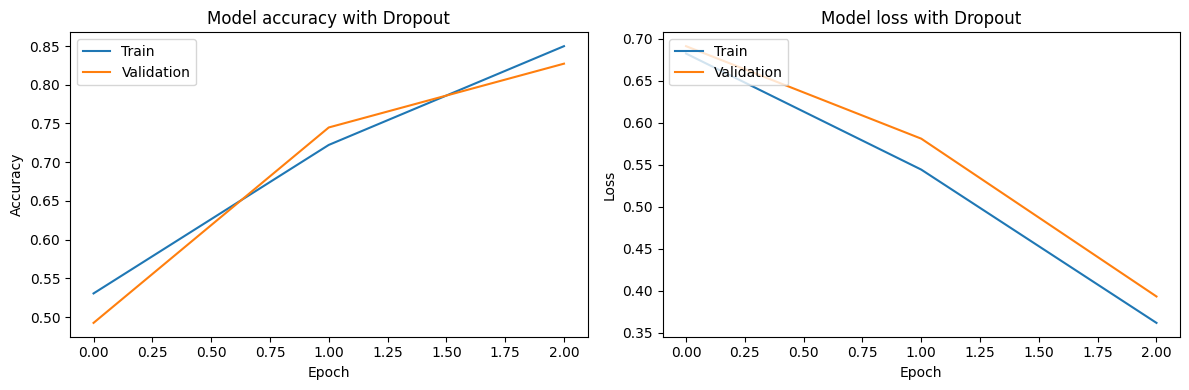

In [ ]:
# Evaluate the model on the test set
test_loss_dropout, test_accuracy_dropout = model_dropout.evaluate(x_test, y_test)
print(f'Test Loss with Dropout: {test_loss_dropout}')
print(f'Test Accuracy with Dropout: {test_accuracy_dropout}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.title('Model accuracy with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.title('Model loss with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# **Hyperparameter Tuning 2 :** :Add more units

In [ ]:
# Define the model with more units
model_more_units = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(128),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_more_units.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

# Train the model with more units
history_more_units = model_more_units.fit(
    x_train_new, y_train_new,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)



Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 410s 652ms/step - accuracy: 0.6967 - loss: 0.5495 - val_accuracy: 0.8316 - val_loss: 0.4210
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 458s 678ms/step - accuracy: 0.8831 - loss: 0.2922 - val_accuracy: 0.8480 - val_loss: 0.3502
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 433s 664ms/step - accuracy: 0.9214 - loss: 0.2104 - val_accuracy: 0.8756 - val_loss: 0.3191


Model Evaluation (Hyperparameter Tuning 2 )

782/782 ━━━━━━━━━━━━━━━━━━━━ 183s 234ms/step - accuracy: 0.8352 - loss: 0.4083
Test Loss with More Units: 0.40815597772598267
Test Accuracy with More Units: 0.8360000252723694


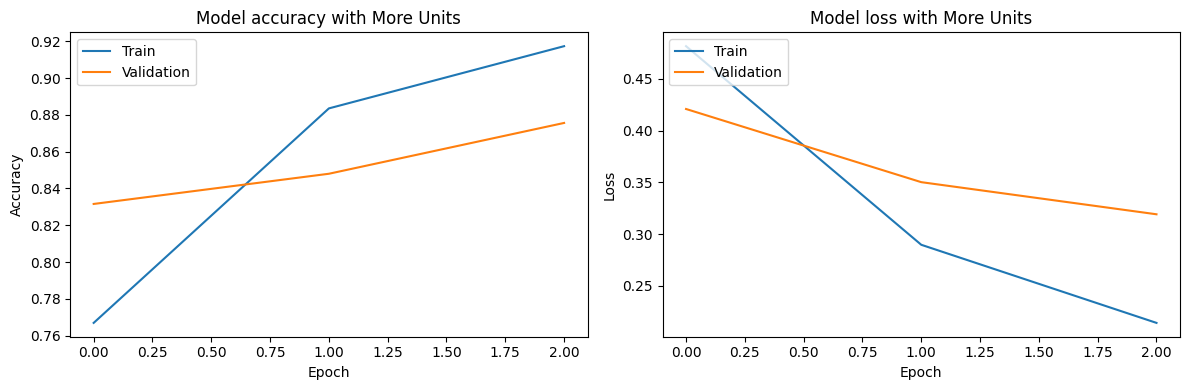

In [ ]:
# Evaluate the model on the test set
test_loss_more_units, test_accuracy_more_units = model_more_units.evaluate(x_test, y_test)
print(f'Test Loss with More Units: {test_loss_more_units}')
print(f'Test Accuracy with More Units: {test_accuracy_more_units}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_more_units.history['accuracy'])
plt.plot(history_more_units.history['val_accuracy'])
plt.title('Model accuracy with More Units')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_more_units.history['loss'])
plt.plot(history_more_units.history['val_loss'])
plt.title('Model loss with More Units')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# **Hyperparameter Tuning 3:** Change Learning rate




# Model Build (Hyperparameter Tuning 3)

In [ ]:
# Define the model with different learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_different_lr = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_different_lr.compile(optimizer=optimizer,
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

# Train the model with different learning rate
history_different_lr = model_different_lr.fit(
    x_train_new, y_train_new,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)



Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 274ms/step - accuracy: 0.5729 - loss: 0.6731 - val_accuracy: 0.8390 - val_loss: 0.4104
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 285ms/step - accuracy: 0.8626 - loss: 0.3478 - val_accuracy: 0.8752 - val_loss: 0.2935
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 282ms/step - accuracy: 0.9132 - loss: 0.2324 - val_accuracy: 0.8838 - val_loss: 0.2788
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 302ms/step - accuracy: 0.9338 - loss: 0.1903 - val_accuracy: 0.8862 - val_loss: 0.2809
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 304ms/step - accuracy: 0.9501 - loss: 0.1487 - val_accuracy: 0.8886 - val_loss: 0.2813
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 171s 273ms/step - accuracy: 0.9615 - loss: 0.1259 - val_accuracy: 0.8868 - val_loss: 0.2947


# Model Evaluation (hyperparameter Tuning 3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.8808 - loss: 0.2896
Test Loss with Different Learning Rate: 0.29031822085380554
Test Accuracy with Different Learning Rate: 0.8809199929237366


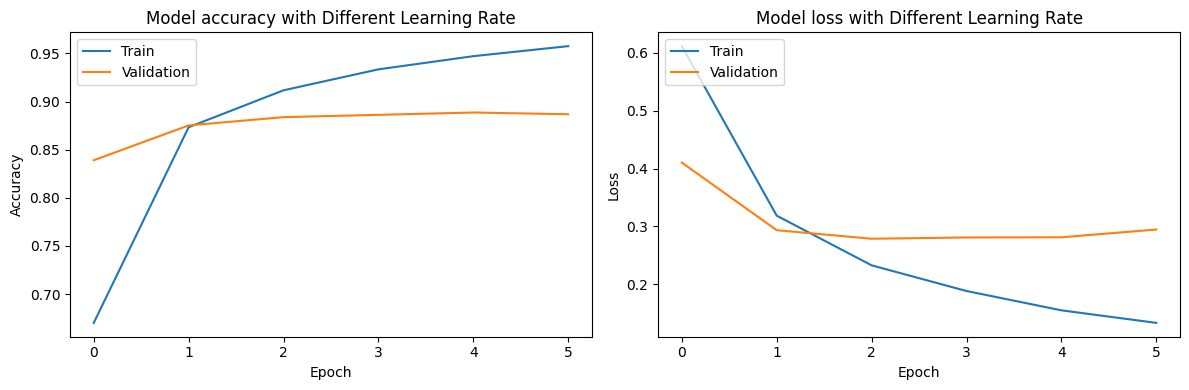

In [ ]:
# Evaluate the model on the test set
test_loss_different_lr, test_accuracy_different_lr = model_different_lr.evaluate(x_test, y_test)
print(f'Test Loss with Different Learning Rate: {test_loss_different_lr}')
print(f'Test Accuracy with Different Learning Rate: {test_accuracy_different_lr}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_different_lr.history['accuracy'])
plt.plot(history_different_lr.history['val_accuracy'])
plt.title('Model accuracy with Different Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_different_lr.history['loss'])
plt.plot(history_different_lr.history['val_loss'])
plt.title('Model loss with Different Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# **FeedForward Neural Network (FNN) Model**

In [ ]:
from tensorflow.keras.layers import Flatten

# Define the feedforward neural network model
model_fnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the FNN model
model_fnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])



## **FFN Model Train**

In [ ]:
# Train the FNN model
history_fnn = model_fnn.fit(
    x_train_new, y_train_new,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.6680 - loss: 0.5507 - val_accuracy: 0.8702 - val_loss: 0.3135
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9580 - loss: 0.1215 - val_accuracy: 0.8490 - val_loss: 0.3837
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9931 - loss: 0.0229 - val_accuracy: 0.8496 - val_loss: 0.6397


# **FFN Evaluation**

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8645 - loss: 0.3191
Test Loss (FNN): 0.3168751299381256
Test Accuracy (FNN): 0.8654000163078308


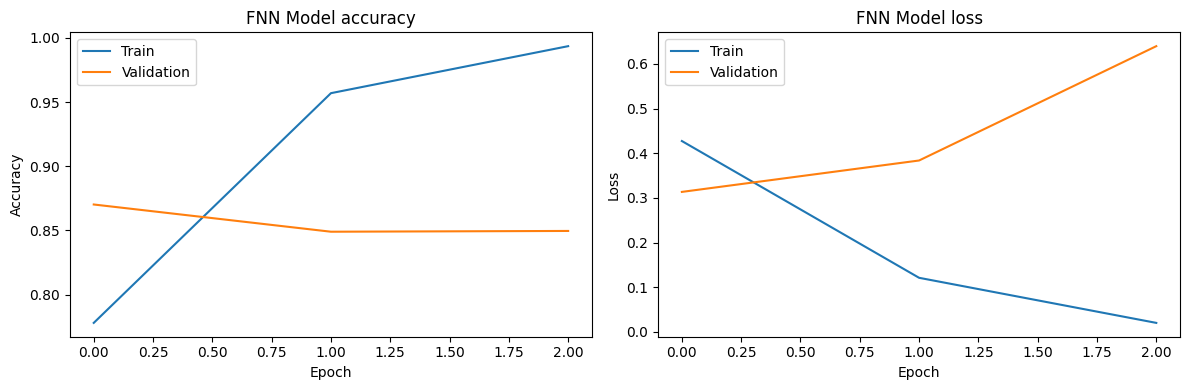

In [ ]:
# Evaluate the FNN model on the test set
test_loss_fnn, test_accuracy_fnn = model_fnn.evaluate(x_test, y_test)
print(f'Test Loss (FNN): {test_loss_fnn}')
print(f'Test Accuracy (FNN): {test_accuracy_fnn}')

# Plot training & validation accuracy and loss values for FNN
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_fnn.history['accuracy'])
plt.plot(history_fnn.history['val_accuracy'])
plt.title('FNN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_fnn.history['loss'])
plt.plot(history_fnn.history['val_loss'])
plt.title('FNN Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()